<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/10_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**


## **10장 합성곱신경망**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 딥러닝 스타트 저자 : 박동규
*  소스코드 저장소 : https://github.com/dongupak/DLstart
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 01 디지털 이미지, 합성곱 신경망 그리고 필터

---
#### 이미지 불러오기와 흐림 필터 적용하기

Text(0.5, 1.0, 'Sample image : flower.jpg')

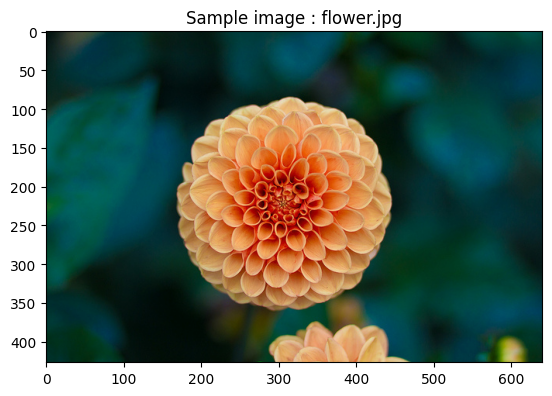

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import cv2

flower = load_sample_image('flower.jpg')
plt.imshow(flower)
plt.title('Sample image : flower.jpg')

In [ ]:
print('flower.shape =', flower.shape)
print('flower.dtype =', flower.dtype)

flower.shape = (427, 640, 3)
flower.dtype = uint8


Text(0.5, 1.0, '9x9 Blur filter')

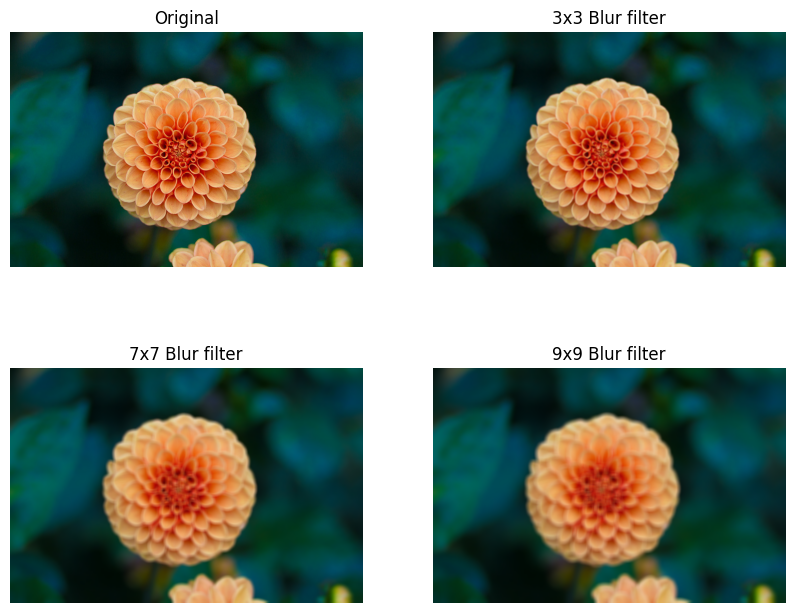

In [ ]:
def blur_filter(img, n):
    filter = np.ones((n, n), np.float32) / (n * n)
    blurred = cv2.filter2D(img, -1, filter)
    return blurred

flower = load_sample_image('flower.jpg')
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax[0,0].imshow(flower)
ax[0,0].axis('off')
ax[0,0].set_title('Original')

ax[0,1].imshow(blur_filter(flower, 3))
ax[0,1].axis('off')
ax[0,1].set_title('3x3 Blur filter')

ax[1,0].imshow(blur_filter(flower, 7))
ax[1,0].axis('off')
ax[1,0].set_title('7x7 Blur filter')

ax[1,1].imshow(blur_filter(flower, 9))
ax[1,1].axis('off')
ax[1,1].set_title('9x9 Blur filter')

#### 경계를 검출하기 위한 필터

Text(0.5, 1.0, 'Horizontal Filter Result')

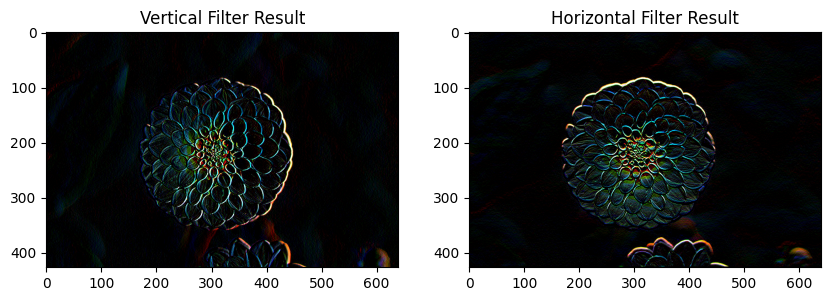

In [ ]:
v_filter = np.array([[ 4, 0, -4]]) # 수직 경계를 강조하는 필터

v_filtered = cv2.filter2D(flower, -1, v_filter)

h_filter = np.array([[ -4],
                   [0],
                   [4]]) # 수평 경계를 강조하는 필터

h_filtered = cv2.filter2D(flower, -1, h_filter)

fig, ax = plt.subplots(1, 2, figsize = (10, 8))
ax[0].imshow(v_filtered)
ax[0].set_title('Vertical Filter Result')

ax[1].imshow(h_filtered)
ax[1].set_title('Horizontal Filter Result')

### 03 합성곱 신경망을 위한 채널과 필터, 평탄화 과정

#### 합성곱 신경망의 최종 단계: 평탄화

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (64, 64, 3),\
                        kernel_size = (3, 3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',\
                        filters = 64),
... ])

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# keras의 데이터셋의 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =\
fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

### 04 합성곱 신경망의 구조와 모델 훈련 과정
#### 합성곱 신경망 모델의 전체 구조

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =\
    fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

In [ ]:
model = keras.models.Sequential( [
   keras.layers.Conv2D(input_shape = (28, 28, 1),
                       kernel_size = (3,3), padding = 'same',
                       filters = 32),
   keras.layers.MaxPooling2D((2, 2), strides=2),
   keras.layers.Conv2D(kernel_size = (3,3), padding ='same',
                       filters = 64),
   keras.layers.MaxPooling2D((2, 2), strides=2),
   keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                       filters = 32),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation = 'relu'),
   keras.layers.Dense(32, activation = 'relu'),
   keras.layers.Dense(10, activation = 'softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 1568)              0

#### 합성곱 신경망 모델의 훈련

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 77s 54ms/step - loss: 0.4574 - accuracy: 0.8339 - val_loss: 0.3691 - val_accuracy: 0.8658
Epoch 2/5
1407/1407 [==============================] - 69s 49ms/step - loss: 0.2980 - accuracy: 0.8908 - val_loss: 0.2929 - val_accuracy: 0.8918
Epoch 3/5
1407/1407 [==============================] - 66s 47ms/step - loss: 0.2516 - accuracy: 0.9058 - val_loss: 0.2706 - val_accuracy: 0.8981
Epoch 4/5
1407/1407 [==============================] - 77s 55ms/step - loss: 0.2207 - accuracy: 0.9182 - val_loss: 0.2495 - val_accuracy: 0.9092
Epoch 5/5
1407/1407 [==============================] - 70s 50ms/step - loss: 0.1942 - accuracy: 0.9283 - val_loss: 0.2540 - val_accuracy: 0.9102


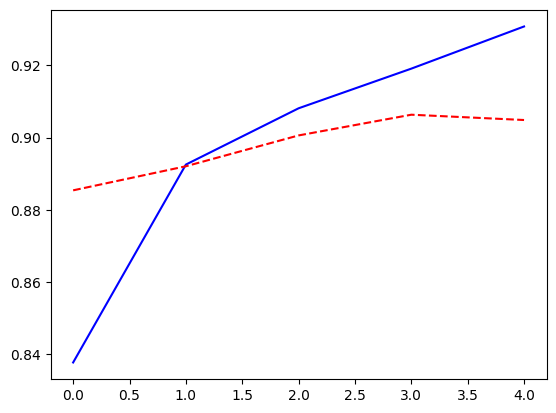

In [ ]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                    verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 3s - loss: 0.2906 - accuracy: 0.9032 - 3s/epoch - 10ms/step
테스트 정확도: 0.9031999707221985


In [ ]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

images = test_images[:25]
pred = np.argmax(model.predict(images), axis=1)
print('예측값 =', pred)
print('실제값 =', test_labels[:25])

1/1 [==============================] - 0s 124ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 6 8 0 2 5 7 5 1]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


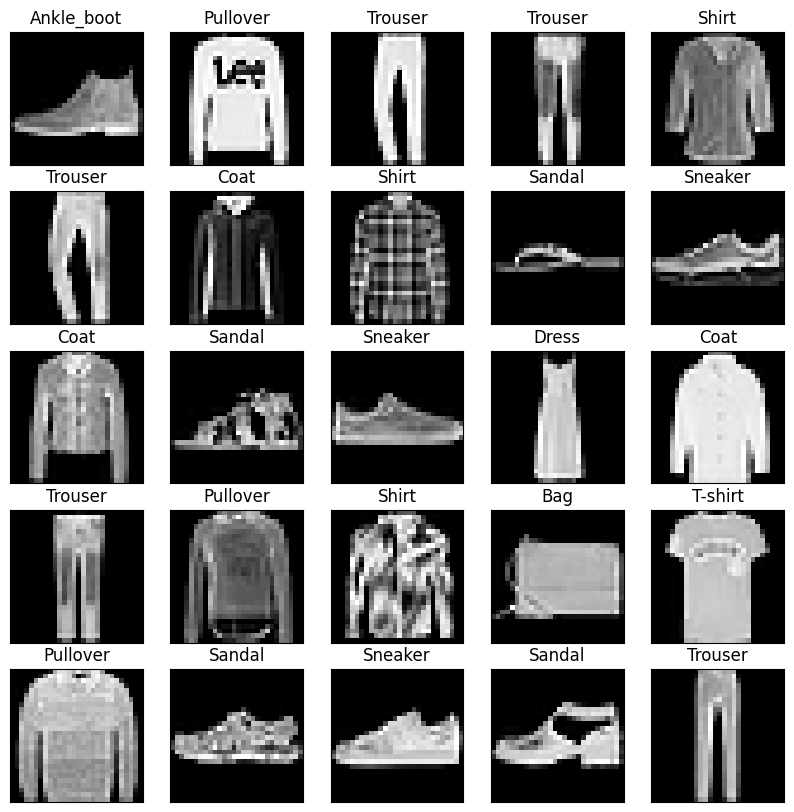

In [ ]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                       figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
    for j in range(images_per_row):
        if i*images_per_row + j >= n_images: break
        img_idx = i*images_per_row + j
        a_image = images[img_idx].reshape(28,28)
        if n_rows>1: axis = ax[i, j]
        else: axis = ax[j]
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        label = mnist_lbl[labels[img_idx]]
        axis.set_title(label)
        axis.imshow(a_image, cmap='gray', interpolation='nearest')

plot_images(images, pred, images_per_row = 5)

313/313 [==============================] - 8s 25ms/step


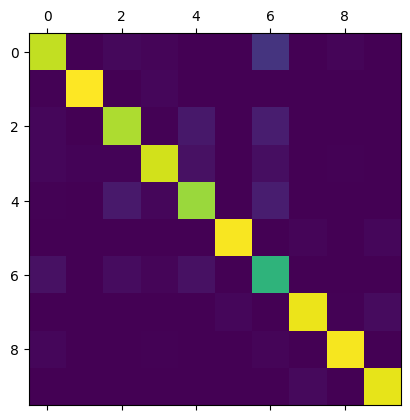

In [ ]:
from sklearn.metrics import confusion_matrix

pred = np.argmax(model.predict(test_images), axis=1)
conf_mat = confusion_matrix(pred, test_labels)
plt.matshow(conf_mat)

In [ ]:
print(conf_mat)

[[898   2  20  12   2   1 148   0  14   0]
 [  4 989   0  19   3   0   2   0   0   0]
 [ 18   0 866   7  63   0  79   0   0   0]
 [ 17   8  11 922  45   0  36   0   4   0]
 [  4   0  68  18 842   0  78   0   1   0]
 [  0   0   0   1   0 981   0  14   2  16]
 [ 43   0  32  14  43   0 645   0   0   0]
 [  0   0   0   0   0  16   0 961   4  29]
 [ 16   1   3   7   2   1  12   0 974   1]
 [  0   0   0   0   0   1   0  25   1 954]]
